In [30]:
library(limma) 
library(edgeR) 
library(ggplot2)
library(dplyr)
library('Glimma')
library(ggplot2)
library("circlize")
library("RColorBrewer")
library(data.table)
library(cowplot)
library(ggrepel)
library(dplyr)
library(gplots)   # contains the heatmap.2 package
library(tidyr)
library(stringi)


>The code from this file is used to compute the results for the part 3.1 of the project: **RPPA Data Analysis**.


The dataset used here contains only lumA IDC and lumA ILC samples. This dataset is obtained after the preprocessing of the row RPPA data.

In [31]:
df_samples <- read.table("data/data_rppa_group_colname.txt",sep=',',header=TRUE)
df_samples$X<-NULL
head(df_samples)

group
IDC
IDC
IDC
IDC
IDC
IDC


In [32]:
df_rppa <- read.table("data/data_rppa_group_order.txt",sep=',',header=TRUE)
df_rppa$X<-NULL
rownames(df_rppa)<- df_rppa$protein
df_rppa$protein<-c()
df_rppa<-df_rppa[c("PI3K-p110-alpha","PI3K-p85","PTEN",'INPP4B',"Akt","Akt_pS473","Akt_pT308","EGFR","EGFR_pY1068","EGFR_pY1173","STAT3_pY705","mTOR_pS2448","p70S6K_pT389"),]
head(df_rppa)

,IDC,IDC.1,IDC.2,IDC.3,IDC.4,IDC.5,IDC.6,IDC.7,IDC.8,IDC.9,...,ILC.66,ILC.67,ILC.68,ILC.69,ILC.70,ILC.71,ILC.72,ILC.73,ILC.74,ILC.75
PI3K-p110-alpha,-0.146650,0.34025,-0.032093,-0.461770,-0.061135,0.355070,0.0304380,0.01286,0.011013,0.0063777,...,0.47955,0.076397,0.264470,0.445600,0.288840,-0.018524,0.48383,0.14716,0.477600,0.26699
PI3K-p85,0.201540,-0.34691,0.054821,-0.677420,0.085804,-0.391070,-0.0068892,0.08260,-0.292720,0.1836800,...,0.51092,0.544590,0.038201,0.249390,-0.037151,-0.054157,0.71983,0.43558,0.470220,-0.14809
PTEN,-0.575920,-1.30030,0.421620,-3.182300,-0.624410,0.040091,0.2169600,0.15788,0.291870,1.3414000,...,0.59195,-0.476570,-0.920410,0.053379,-0.585410,-0.044154,0.22485,1.97410,-0.441590,-0.15774
INPP4B,-0.046085,1.07230,-0.117210,0.415160,1.409600,1.823800,1.0852000,1.39060,0.584900,0.0168430,...,2.92690,1.039800,2.020700,2.015100,2.391500,1.010300,-0.23680,1.84740,0.084805,0.75766
Akt,-0.449710,-0.71486,-0.807260,-1.228100,-1.181100,0.141820,-0.3290000,-0.25415,0.419810,0.2363100,...,0.66192,0.267890,-0.074937,0.079328,-0.142740,-0.494530,-0.15264,0.28256,-0.087611,0.07553
Akt_pS473,-1.271100,-1.69390,-0.559600,-0.022269,-1.501300,-1.273400,-1.2018000,-0.44949,-0.494270,-0.7283000,...,0.40633,1.646400,1.192400,0.551300,0.739740,1.007100,1.29670,1.52670,1.292000,1.27800


In [33]:
dim(df_samples)

[1] 235   1

In [36]:
mycol <- colorpanel(200,"blue","white","#FF0000")

In [37]:
prob_matrix=data.matrix(df_rppa)
colnames(prob_matrix)=df_samples$group


In [38]:
prob_matrix

,IDC,IDC,IDC,IDC,IDC,IDC,IDC,IDC,IDC,IDC,...,ILC,ILC,ILC,ILC,ILC,ILC,ILC,ILC,ILC,ILC
PI3K-p110-alpha,-0.1466500,0.340250,-0.032093,-0.461770,-0.061135,0.355070,0.0304380,0.012860,0.011013,0.0063777,...,0.479550,0.076397,0.2644700,0.445600,0.288840,-0.018524,0.48383,0.147160,0.477600,0.26699
PI3K-p85,0.2015400,-0.346910,0.054821,-0.677420,0.085804,-0.391070,-0.0068892,0.082600,-0.292720,0.1836800,...,0.510920,0.544590,0.0382010,0.249390,-0.037151,-0.054157,0.71983,0.435580,0.470220,-0.14809
PTEN,-0.5759200,-1.300300,0.421620,-3.182300,-0.624410,0.040091,0.2169600,0.157880,0.291870,1.3414000,...,0.591950,-0.476570,-0.9204100,0.053379,-0.585410,-0.044154,0.22485,1.974100,-0.441590,-0.15774
INPP4B,-0.0460850,1.072300,-0.117210,0.415160,1.409600,1.823800,1.0852000,1.390600,0.584900,0.0168430,...,2.926900,1.039800,2.0207000,2.015100,2.391500,1.010300,-0.23680,1.847400,0.084805,0.75766
Akt,-0.4497100,-0.714860,-0.807260,-1.228100,-1.181100,0.141820,-0.3290000,-0.254150,0.419810,0.2363100,...,0.661920,0.267890,-0.0749370,0.079328,-0.142740,-0.494530,-0.15264,0.282560,-0.087611,0.07553
Akt_pS473,-1.2711000,-1.693900,-0.559600,-0.022269,-1.501300,-1.273400,-1.2018000,-0.449490,-0.494270,-0.7283000,...,0.406330,1.646400,1.1924000,0.551300,0.739740,1.007100,1.29670,1.526700,1.292000,1.27800
Akt_pT308,-1.0200000,-0.601790,-0.547270,0.398250,-0.866230,-1.291500,-1.1570000,-1.225200,-0.715350,-0.9323200,...,-0.186210,1.158900,0.9074900,0.346540,0.539660,0.851330,1.24170,0.709920,0.836320,1.16210
EGFR,-0.3008900,-0.408520,-0.619770,0.462950,-0.131960,-0.364310,-0.2351600,-0.254470,-0.584930,-0.5195100,...,-0.400240,-0.188100,-0.0811890,-0.326790,-0.123470,-0.150290,0.31710,-0.314250,0.424980,0.37379
EGFR_pY1068,0.0118550,0.334350,-0.272890,0.340270,0.016387,-0.151510,-0.1107900,-0.287920,-0.189530,-0.4813200,...,-0.070973,0.345560,-0.0222970,0.520750,0.670960,0.693730,0.54893,-0.048629,0.746320,0.45179
EGFR_pY1173,0.1757500,0.037041,-0.018255,1.175900,0.503580,0.072492,0.2350900,-0.026328,-0.141800,-0.2218600,...,-0.101810,0.169210,0.0026835,0.068779,0.115170,0.457390,0.67780,-0.055859,0.338280,0.37237


In [39]:
group_df = data.frame(df_samples) 
group_df[group_df$group=="IDC","color"] = "#1565C0"
group_df[group_df$group=="ILC","color"] = "#FF9900"

In [40]:
subtype_colors= group_df$color

In [41]:
clab=cbind(subtype_colors)

In [46]:
colnames(clab)=c("Subtype")

In [43]:
mydist=function(x) {as.dist(1-cor(t(x)))}
myclust=function(x) {hclust(x, method="ward.D")}

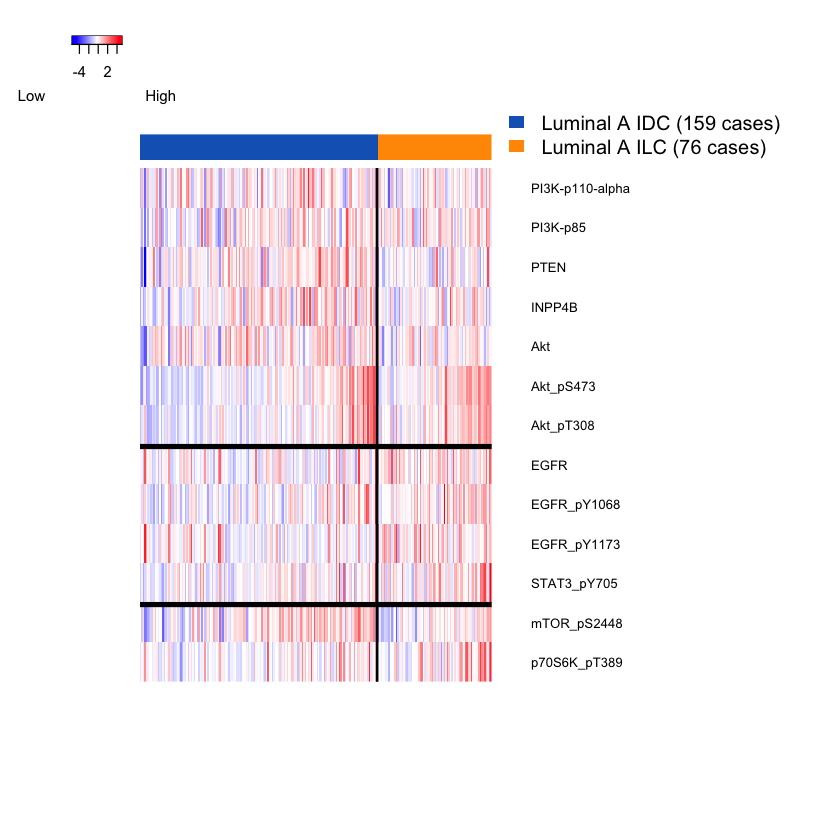

In [44]:
#png(file="fig/fig41_white.png",width=6000,height=5000,res=500)
par(cex.lab=1)
heatmap.2(prob_matrix, na.rm = TRUE,scale='row',margins=c(10,22),dendrogram='none',Rowv=FALSE,Colv=FALSE,
           ColSideColors=clab, symbreaks=FALSE,density.info="none",  key=TRUE, key.title = 'Protein expression',   keysize = 0.8, key.xlab = 'Low                        High',key.ylab = 'Density', symkey=FALSE,
          trace="none", labCol=FALSE, cexRow=1, col=mycol, rowsep=c(7, 11),colsep=c(158),sepcolor="black",
           sepwidth=c(1,0.1), offsetRow = 2)
legend("toprigh",legend=c("Luminal A IDC (159 cases)","Luminal A ILC (76 cases)"),
       fill=c("#1565C0","#FF9900"), border=FALSE,bty="n",  y.intersp = 1)
#dev.off()